<a href="https://colab.research.google.com/github/AlexisCohen/Data-Sci/blob/main/Alexis_Cohen_Stats_Lab_Linear_Model_Photo_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [56]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [57]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [58]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p"

In [59]:
url = "https://docs.google.com/presentation/d/1O5xh1OcvxaBpFidjHG86XxGljB38kZ5iOrBdFVRX69c/edit#slide=id.g1a1a0885f10_0_110"

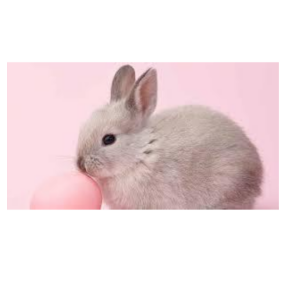

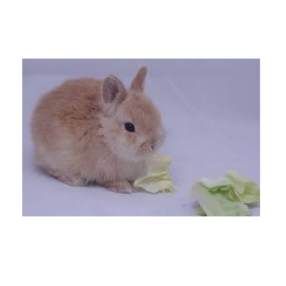

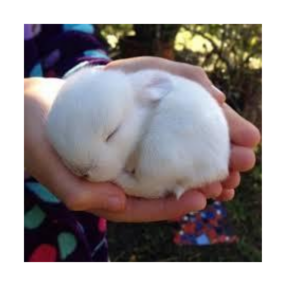

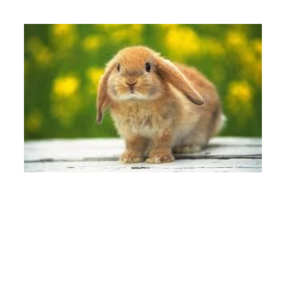

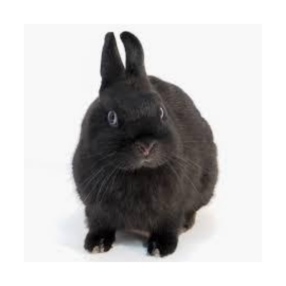

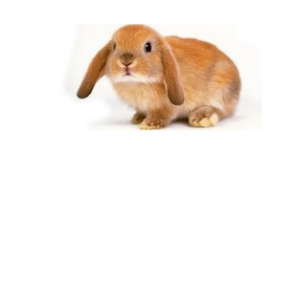

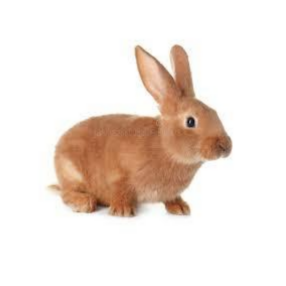

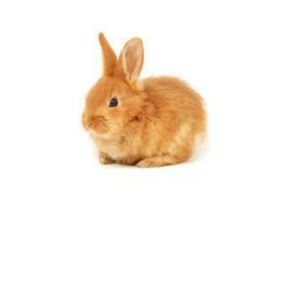

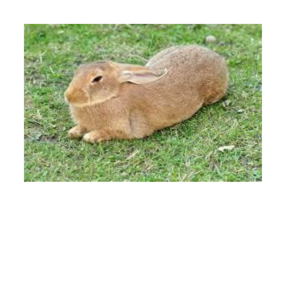

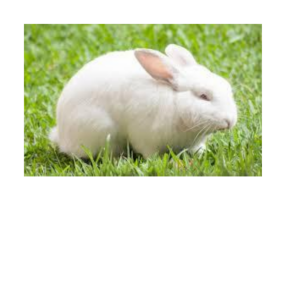

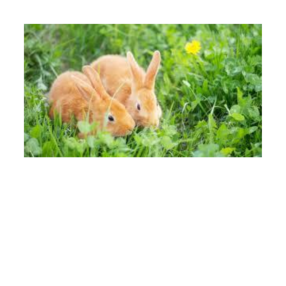

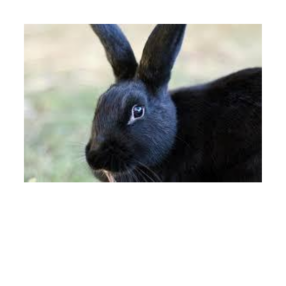

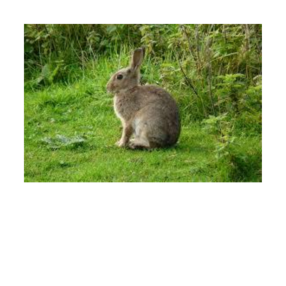

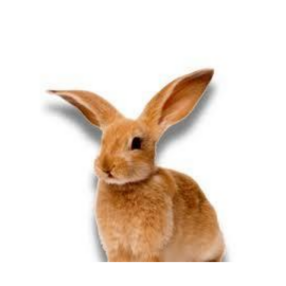

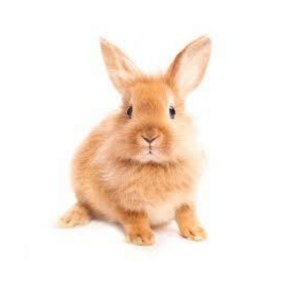

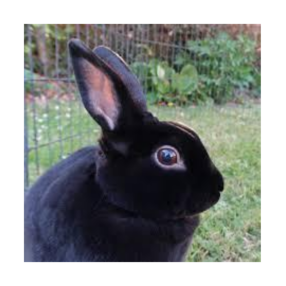

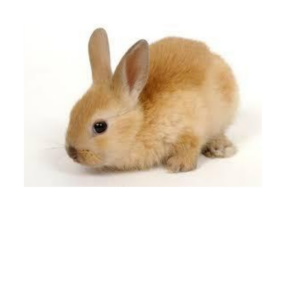

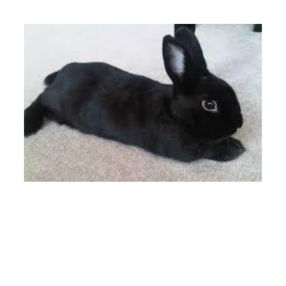

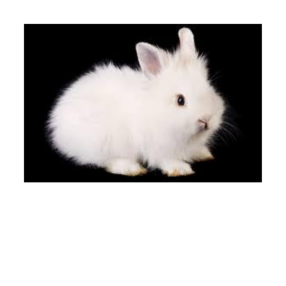

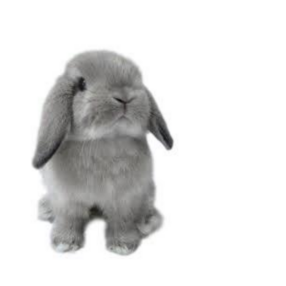

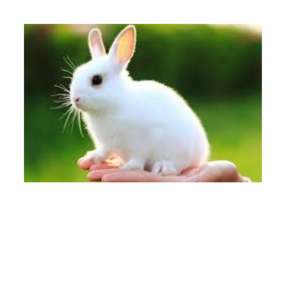

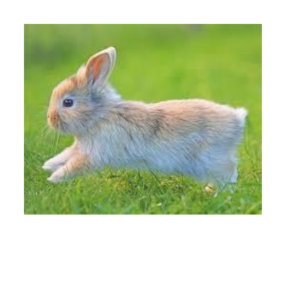

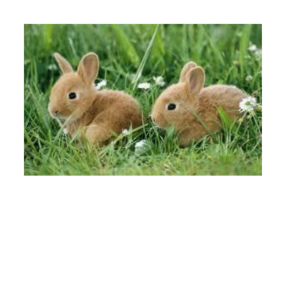

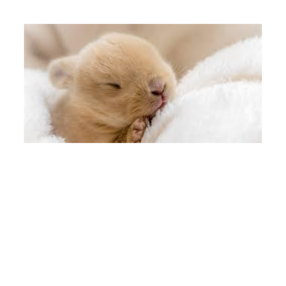

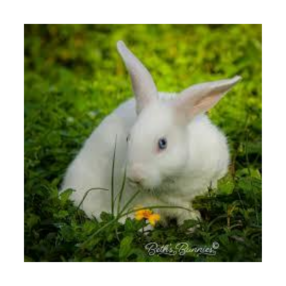

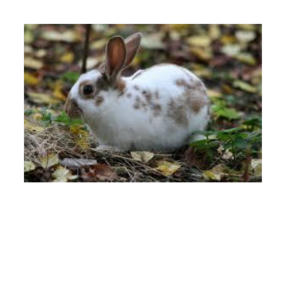

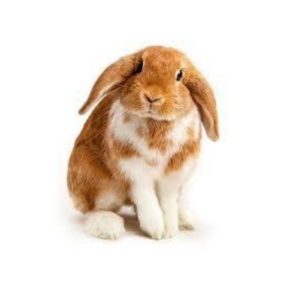

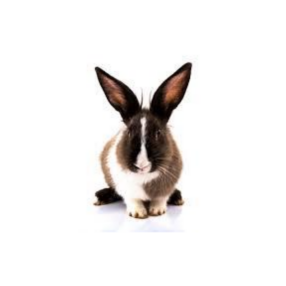

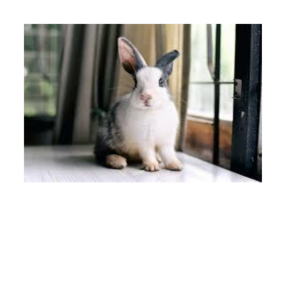

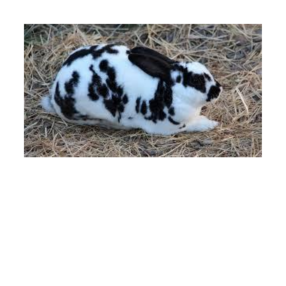

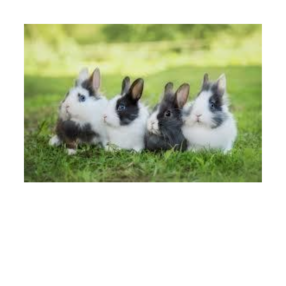

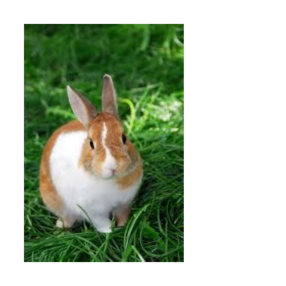

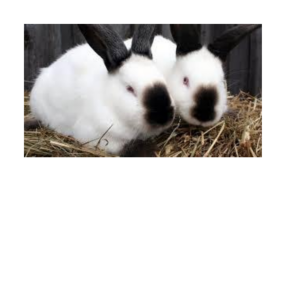

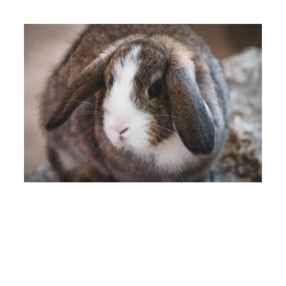

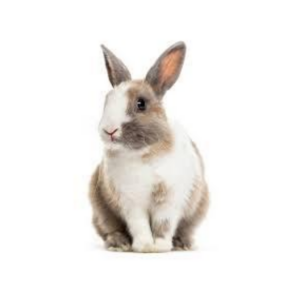

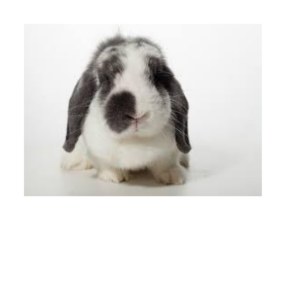

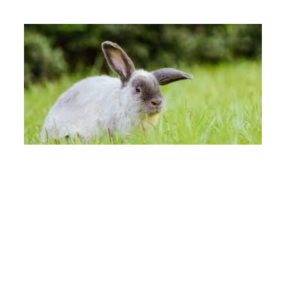

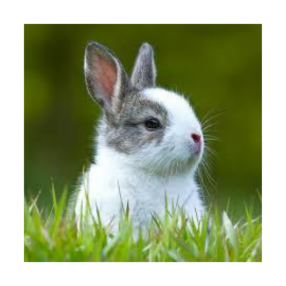

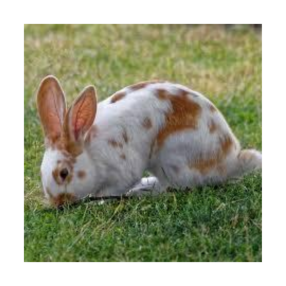

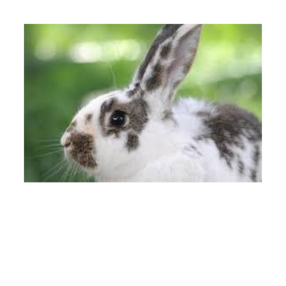

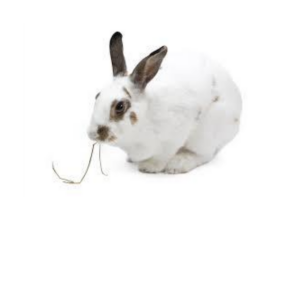

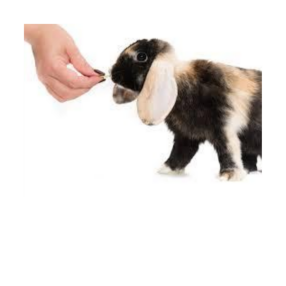

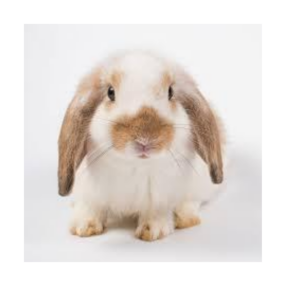

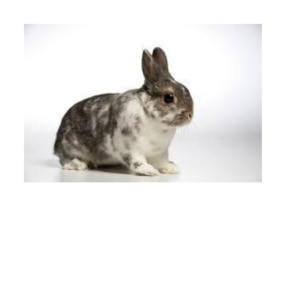

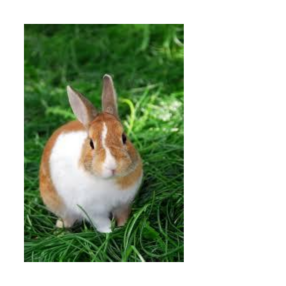

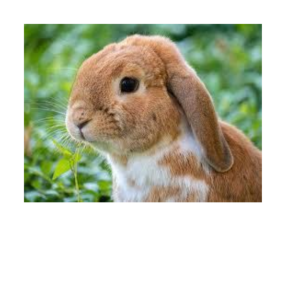

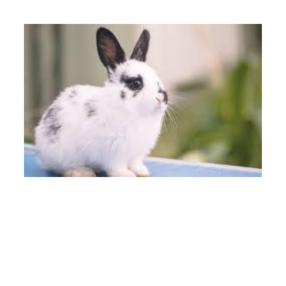

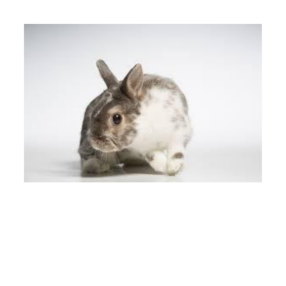

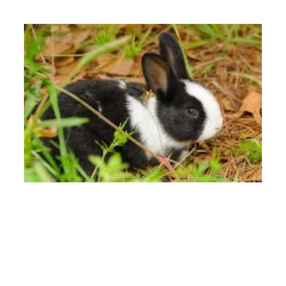

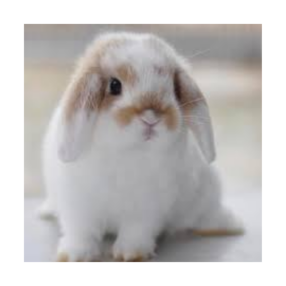

In [60]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [61]:
images.shape

torch.Size([50, 3, 224, 224])

In [62]:
model(images)

tensor([[-2.5638,  0.5679, -0.0578,  ..., -6.0314,  6.4744,  7.0717],
        [-4.0450,  0.5704, -1.7909,  ..., -3.5529,  7.0378,  4.4624],
        [ 3.5992,  2.6164,  4.9405,  ...,  0.6432,  1.5733, -0.8775],
        ...,
        [-1.0649, -1.8737,  0.1086,  ..., -2.6592,  5.9004,  1.8705],
        [-1.6729, -0.8074, -2.4075,  ..., -3.6035,  1.8410,  1.5744],
        [-2.7399,  1.2658,  2.8337,  ..., -3.0241, -1.2583,  3.6247]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [63]:
y = model(images)

In [64]:
y.shape

torch.Size([50, 1000])

In [65]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [66]:
for i in list(guesses):
    print(labels[i])

hare
hare
axolotl, mud puppy, Ambystoma mexicanum
Norfolk terrier
schipperke
Norfolk terrier
hare
hamster
guinea pig, Cavia cobaya
sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita
chow, chow chow
schipperke
wood rabbit, cottontail, cottontail rabbit
hare
Angora, Angora rabbit
schipperke
hamster
mousetrap
Angora, Angora rabbit
mink
hamster
hare
fox squirrel, eastern fox squirrel, Sciurus niger
Bedlington terrier
hare
ptarmigan
collie
Cardigan, Cardigan Welsh corgi
Siamese cat, Siamese
dalmatian, coach dog, carriage dog
Siberian husky
tiger cat
ping-pong ball
guinea pig, Cavia cobaya
Siamese cat, Siamese
Saint Bernard, St Bernard
hare
hare
Brittany spaniel
hare
hare
black-footed ferret, ferret, Mustela nigripes
guinea pig, Cavia cobaya
Cardigan, Cardigan Welsh corgi
tiger cat
Norfolk terrier
hare
wood rabbit, cottontail, cottontail rabbit
Cardigan, Cardigan Welsh corgi
guinea pig, Cavia cobaya


In [67]:
Y = np.zeros(50,)
Y[25:] = 1

In [68]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [69]:
X = y.detach().cpu().numpy() 

In [70]:
X.shape

(50, 1000)

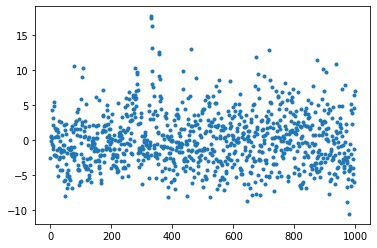

In [71]:
plt.plot(X[0],'.')

In [72]:
X[0]

array([-2.5637846e+00,  5.6791520e-01, -5.7806849e-02,  4.2641771e-01,
       -5.7405096e-01,  4.3322816e+00,  3.7166986e-01, -7.9369402e-01,
        2.2244537e+00, -1.2638508e+00,  3.2089076e+00, -2.1371958e+00,
        4.8442564e+00,  5.4910092e+00,  4.2196918e-01, -2.0677738e+00,
        1.7658463e+00,  1.4326530e+00, -2.2482328e+00, -2.2127032e+00,
        5.6068331e-01,  1.5870948e+00, -1.4317383e+00, -3.7572117e+00,
        1.1632773e+00, -5.1690736e+00,  4.1571760e-01, -2.6410525e+00,
       -1.1550264e+00,  2.6907561e+00, -4.3100338e+00, -1.6575943e-01,
       -1.1978204e+00, -2.4622588e+00, -1.7396612e+00, -1.7445250e+00,
        2.5789289e+00, -1.4876852e+00,  7.0796007e-01, -4.2745466e+00,
       -7.1666360e-01, -1.4094272e+00, -2.4540193e+00, -6.2914807e-01,
        2.1477742e+00, -5.7887659e+00, -1.6037741e+00,  1.4309955e+00,
       -5.7237401e+00, -7.9730129e+00, -3.4384427e+00,  8.0960023e-01,
        2.2800014e+00, -4.6289964e+00, -1.8656796e+00, -5.1023221e+00,
      

In [73]:
np.argmax(X[0])

331

In [74]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [75]:
for i in top_ten:
  print(labels[i])

hare
wood rabbit, cottontail, cottontail rabbit
hamster
Angora, Angora rabbit
bucket, pail
piggy bank, penny bank
weasel
mink
mousetrap
tub, vat


(array([ 11.,  82., 222., 304., 214., 110.,  36.,  13.,   5.,   3.]),
 array([-10.531346 ,  -7.7087255,  -4.886105 ,  -2.0634842,   0.7591364,
          3.581757 ,   6.404378 ,   9.226998 ,  12.049619 ,  14.87224  ,
         17.69486  ], dtype=float32),
 <a list of 10 Patch objects>)

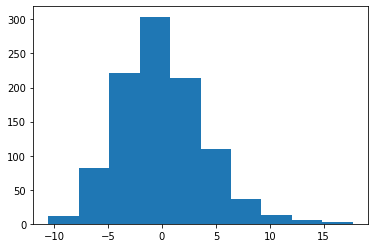

In [76]:
plt.hist(X[0])

In [77]:
X = GPU_data(X)
Y = GPU_data(Y)

In [78]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [79]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [80]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [81]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [82]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [83]:
X.shape

torch.Size([50, 1000])

In [84]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [85]:
def model(x,w):

    return x@w[0]

In [86]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


acc_train,▃▁▃▇█▇█▇██▇█▇▇▆▇▇▇▇▇▇▆▇▅▇▇▇▇▇▅▇▇▇▇▇█▆█▇▆
loss,▆█▅▁▁▁▁▁▁▁▁▁▁▁▃▁▃▁▃▁▁▃▁▃▂▁▁▃▁▃▁▃▁▃▁▁▃▁▁▃
acc_train,0.75
loss,0.56326


<ipython-input-56-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/